In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
from scipy import optimize
import math
%matplotlib inline 

In [2]:
data = scipy.io.loadmat('data/ex3data1.mat')

In [3]:
X = data['X']
y = data['y'].flatten()
print X[:5]
print y[:5]

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[10 10 10 10 10]


In [4]:
m, _ = X.shape
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10  

In [5]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(range(m))
sel = X[rand_indices[0:100], :]

/Users/andy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/andy/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
displayData.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  display_array[min(rows):max(rows), min(cols):max(cols)] = X[curr_ex, :].reshape(example_height, example_width) / max_val


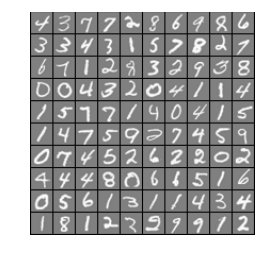

In [6]:
from displayData import displayData
displayData(sel)

In [7]:
weight = scipy.io.loadmat('data/ex3weights.mat')

In [8]:
y.shape

(5000,)

In [9]:
def sigmoid(z):
    return 1 / (1 + np.e ** -z)

\>>> a = np.arange(6).reshape(2,3)  
\>>> a
array([[0, 1, 2], [3, 4, 5]])  
\>>> np.argmax(a)  
5  
\>>> np.argmax(a, axis=0)  
array([1, 1, 1])  
\>>> np.argmax(a, axis=1)  
array([2, 2])  

In [10]:
def predict(theta1, theta2, X):
    a1 = np.column_stack((np.ones(X.shape[0]),X))
    print a1.shape
    a2 = sigmoid(a1.dot(theta1.T))
    a2 = np.column_stack((np.ones(a2.shape[0]),a2))
    print a2.shape
    a3 = sigmoid(a2.dot(theta2.T))
    print a3.shape
    prediction = np.argmax(a3,axis=1)+1
    
    if True:
        import matplotlib.pyplot as p
        ex = np.random.randint(0, 5000)
        print 'Ans: ' + str(y[ex]), 'prediction: ' + str(prediction[ex])
        a = X[ex,:]
        a = a.reshape([20,20])
        p.imshow(a)
        p.show()

    return prediction

(5000, 401)
(5000, 26)
(5000, 10)
Ans: 9 prediction: 9


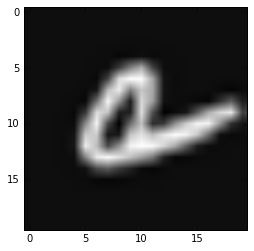

0.97519999999999996

In [11]:
prediction = predict(weight['Theta1'], weight['Theta2'], X)
(prediction==y).mean()